In [1]:
conn_db = 0
save_figs = 0

In [2]:
import pandas as pd
import sqlite3
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

## Load in data and clean

In [3]:
if conn_db == 1: 
    conn = sqlite3.connect('unzippedData/im.db')
    df_imdb = pd.read_sql("""
    SELECT movie_basics.movie_id, primary_title, runtime_minutes, genres, averagerating, numvotes
    FROM movie_ratings 
    JOIN movie_basics
    ON movie_basics.movie_id = movie_ratings.movie_id
    """, conn)
    df_imdb.head()
    df_imdb.to_csv('data/df_imdb.csv', index=False)

In [4]:
df_imdb = pd.read_csv('data/df_imdb.csv')

In [5]:
df_imdb['genres'] = df_imdb['genres'].str.split(',')
df_imdb['genres'] = df_imdb['genres'].where(pd.notna(df_imdb['genres']), None)

In [6]:
print('Dataframe description:')
print(df_imdb.describe())
print('\n-----------------------------------------------------------')
print('Dataframe info:')
print(df_imdb.info())
print('\ndf imdb first 5 rows:')
df_imdb.head()

Dataframe description:
       runtime_minutes  averagerating      numvotes
count     66236.000000   73856.000000  7.385600e+04
mean         94.654040       6.332729  3.523662e+03
std         208.574111       1.474978  3.029402e+04
min           3.000000       1.000000  5.000000e+00
25%          81.000000       5.500000  1.400000e+01
50%          91.000000       6.500000  4.900000e+01
75%         104.000000       7.400000  2.820000e+02
max       51420.000000      10.000000  1.841066e+06

-----------------------------------------------------------
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   runtime_minutes  66236 non-null  float64
 3   genres           73052 non-null  object 
 4   averagerating    73856 non-null  float64
 5

,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,117.0,[Romance],8.3,31
1,tt10384606,Borderless,87.0,[Documentary],8.9,559
2,tt1042974,Just Inès,90.0,[Drama],6.4,20
3,tt1043726,The Legend of Hercules,99.0,"[Action, Adventure, Fantasy]",4.2,50352
4,tt1060240,Até Onde?,73.0,"[Mystery, Thriller]",6.5,21


In [7]:
rt_t13 = df_imdb['runtime_minutes'].quantile(1/3)
rt_t23 = df_imdb['runtime_minutes'].quantile(2/3)

df_imdb['rt_cat']= df_imdb['runtime_minutes'].apply(lambda x: None if np.isnan(x) 
                                                       else ('Short' if x <= rt_t13 
                                                             else ('Medium' if x <= rt_t23 else 'Long')))

In [8]:
# Import information about budgets and profits

df_finance = pd.read_csv("data/tn.movie_budgets.csv.gz")
df_finance['release_date'] = pd.to_datetime(df_finance['release_date'])
df_finance['year'] = df_finance['release_date'].dt.year
df_finance = df_finance[df_finance['year']<2019].reset_index(drop=True)

columns_to_clean = ['domestic_gross', 'worldwide_gross', 'production_budget']

for col in columns_to_clean:
    df_finance[col] = df_finance[col].str.replace('[$,]', '', regex=True).astype(np.int64)

df_finance['domestic_profit'] = df_finance['domestic_gross'] - df_finance['production_budget']
df_finance['domestic_roi'] = df_finance['domestic_profit']/df_finance['production_budget']

df_finance['worldwide_profit'] = df_finance['worldwide_gross'] - df_finance['production_budget']
df_finance['worldwide_roi'] = df_finance['worldwide_profit']/df_finance['production_budget']



In [9]:
print('Dataframe description:')
print(df_finance.describe())
print('\n-----------------------------------------------------------')
print('Dataframe info:')
print(df_finance.info())
print('\ndf_finance first 5 rows:')
df_finance.head()

Dataframe description:
                id                   release_date  production_budget  \
count  5712.000000                           5712       5.712000e+03   
mean     50.358193  2004-04-30 10:48:39.327731072       3.130688e+07   
min       1.000000            1915-02-08 00:00:00       1.100000e+03   
25%      25.000000            2000-03-23 12:00:00       5.000000e+06   
50%      50.000000            2006-12-26 00:00:00       1.700000e+07   
75%      75.000000            2012-10-05 00:00:00       4.000000e+07   
max     100.000000            2018-12-31 00:00:00       4.250000e+08   
std      28.803779                            NaN       4.145821e+07   

       domestic_gross  worldwide_gross         year  domestic_profit  \
count    5.712000e+03     5.712000e+03  5712.000000     5.712000e+03   
mean     4.188445e+07     9.143972e+07  2003.782388     1.057757e+07   
min      0.000000e+00     0.000000e+00  1915.000000    -2.019413e+08   
25%      1.495002e+06     4.242939e+06  

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,domestic_roi,worldwide_profit,worldwide_roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,335507625,0.789430,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,-169536125,-0.412899,635063875,1.546673
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,128405868,0.388403,1072413963,3.243841
3,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,303181382,0.956408,999721747,3.153696
4,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,630662225,2.060988,1747311220,5.710167


## Merge dataframes and visualize relationships

In [10]:
# Prepare columns to merge on
df_imdb['primary_title'] = df_imdb['primary_title'].str.lower()
df_imdb['primary_title'] = df_imdb['primary_title'].str.replace(r'\([^)]*\)', '', regex=True)

df_finance['movie'] = df_finance['movie'].str.lower()
df_finance['movie'] = df_finance['movie'].str.replace(r'\([^)]*\)', '', regex=True)

In [11]:
df_merge = pd.merge(df_finance, df_imdb, left_on='movie', right_on='primary_title', how='inner')

print(f"df shape before dropping duplicates = {df_merge.shape}")
df_merge = df_merge.drop_duplicates(subset='movie', keep='first')
print(f"df shape after dropping duplicates = {df_merge.shape}\n")

print('Dataframe description:')
print(df_merge.describe())
print('\n-----------------------------------------------------------')
print('Dataframe info:')
print(df_merge.info())
print('\ndf_merge first 5 rows:')
df_merge.head()

df shape before dropping duplicates = (2876, 18)
df shape after dropping duplicates = (2132, 18)

Dataframe description:
                id                   release_date  production_budget  \
count  2132.000000                           2132       2.132000e+03   
mean     50.572233  2011-09-12 20:38:43.452157440       3.658997e+07   
min       1.000000            1927-08-12 00:00:00       1.400000e+03   
25%      26.000000            2010-12-30 12:00:00       5.000000e+06   
50%      50.500000            2013-07-19 00:00:00       1.800000e+07   
75%      75.000000            2015-10-16 00:00:00       4.412500e+07   
max     100.000000            2018-12-31 00:00:00       4.250000e+08   
std      28.503269                            NaN       5.038370e+07   

       domestic_gross  worldwide_gross         year  domestic_profit  \
count    2.132000e+03     2.132000e+03  2132.000000     2.132000e+03   
mean     4.595206e+07     1.120209e+08  2011.158537     9.362097e+06   
min      0.000

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,domestic_roi,worldwide_profit,worldwide_roi,movie_id,primary_title,runtime_minutes,genres,averagerating,numvotes,rt_cat
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2009,335507625,0.789430,2351345279,5.532577,tt1775309,avatar,93.0,[Horror],6.1,43,Medium
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,2011,-169536125,-0.412899,635063875,1.546673,tt1298650,pirates of the caribbean: on stranger tides,136.0,"[Action, Adventure, Fantasy]",6.6,447624,Long
2,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,2015,128405868,0.388403,1072413963,3.243841,tt2395427,avengers: age of ultron,141.0,"[Action, Adventure, Sci-Fi]",7.3,665594,Long
3,7,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,2018,378815482,1.262718,1748134200,5.827114,tt4154756,avengers: infinity war,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926,Long
4,9,2017-11-17,justice league,300000000,229024295,655945209,2017,-70975705,-0.236586,355945209,1.186484,tt0974015,justice league,120.0,"[Action, Adventure, Fantasy]",6.5,329135,Long


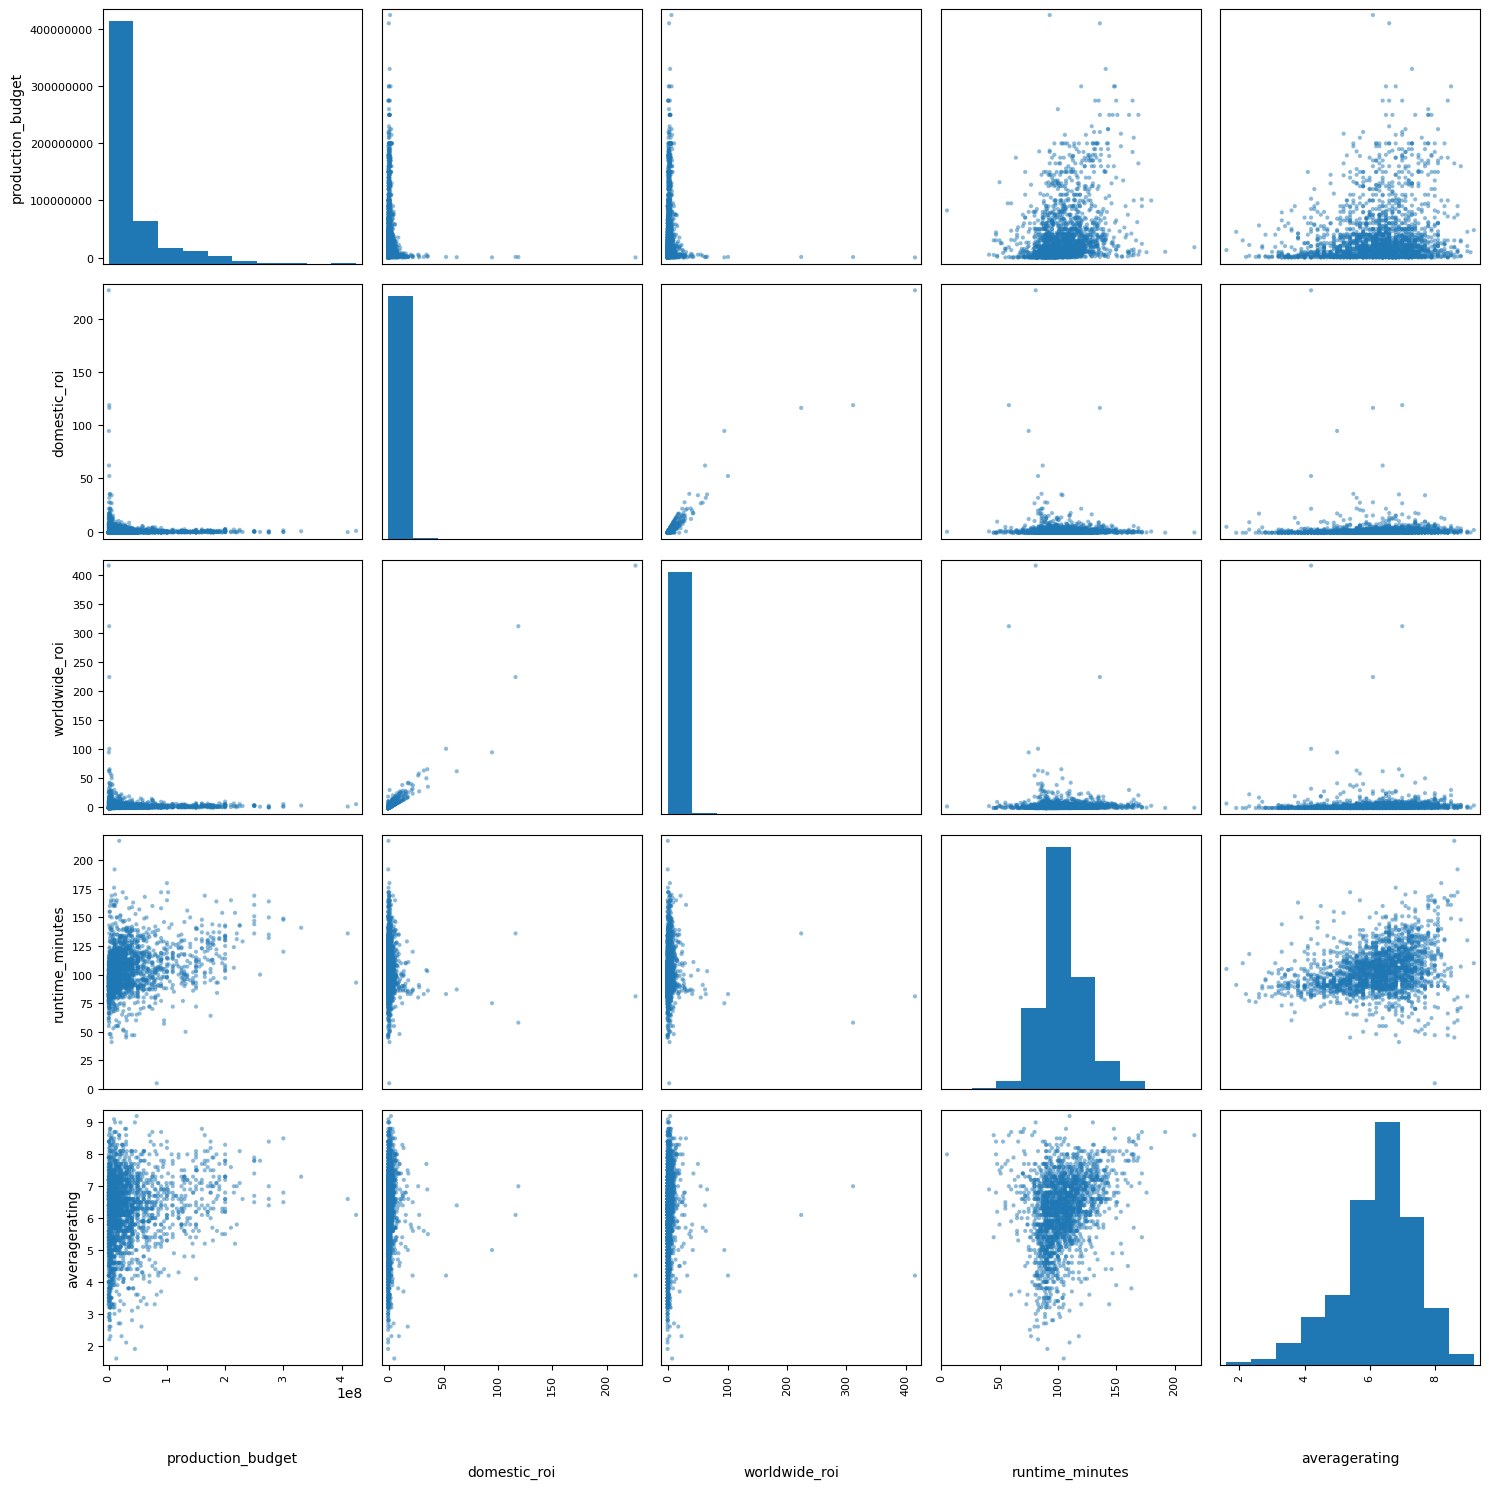

In [12]:
# Increase the size using figsize argument
axs = pd.plotting.scatter_matrix(df_merge[['production_budget', 'domestic_roi', 'worldwide_roi', 'runtime_minutes', 'averagerating']], figsize=(15, 15))

# Rotate x-axis labels
for ax in axs[:, 0]: # only the leftmost column
    ax.xaxis.label.set_rotation(90)

for ax in axs[-1, :]: # only the bottom row
    ax.xaxis.label.set_rotation(0)
    ax.xaxis.labelpad = 50

# Adjust the layout
plt.tight_layout()
plt.show()

## Most profitable genre

In [13]:
df_merge['genres']

0                           [Horror]
1       [Action, Adventure, Fantasy]
2        [Action, Adventure, Sci-Fi]
3        [Action, Adventure, Sci-Fi]
4       [Action, Adventure, Fantasy]
                    ...             
2871                         [Drama]
2872                         [Drama]
2873                 [Comedy, Drama]
2874      [Horror, Sci-Fi, Thriller]
2875       [Drama, Horror, Thriller]
Name: genres, Length: 2132, dtype: object

Drama          1075
Comedy          652
Action          514
Adventure       388
Thriller        359
Crime           292
Horror          265
Romance         254
Sci-Fi          168
Biography       163
Mystery         161
Fantasy         143
Documentary     124
Family          120
Animation       113
Music            67
History          55
Sport            46
War              29
Musical          15
Western          13
News              1
Name: count, dtype: int64


<Axes: >

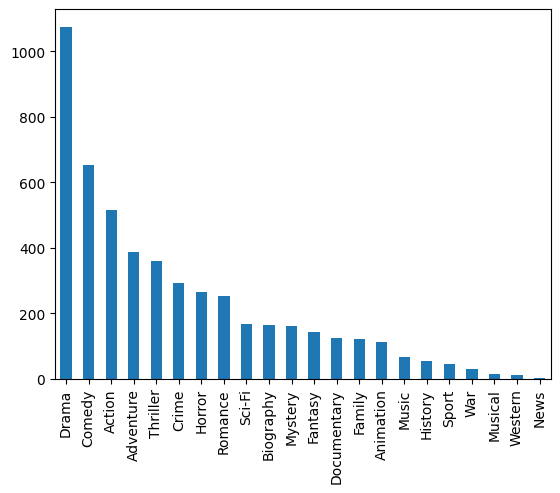

In [14]:
# Calculate and visualize most common genres 
all_genres = [item for sublist in df_merge['genres'] if sublist is not None for item in sublist]
genre_counts = pd.Series(all_genres).value_counts(dropna=False)

print(genre_counts) 
genre_counts.plot(kind='bar')

In [15]:
# Function to get lists of values for each genre
def get_genre_vals(val, df):   
    df_len = len(df)
    all_genre_vals = {}
    
    for genre in genre_counts.index:    
        genre_vals = df[df['genres'].apply(lambda x: genre in x if x is not None else False)][val].values
        genre_len = len(genre_vals) 
        if genre_len < 30:
            continue 
        diff_length = df_len - genre_len
        genre_vals = np.concatenate([genre_vals, [np.nan]*diff_length])
        all_genre_vals[genre] = genre_vals
    all_genre_vals = pd.DataFrame(all_genre_vals)
    all_genre_vals = all_genre_vals.dropna(how='all').reset_index(drop=True)
    return all_genre_vals 

Text(0.5, 1.0, 'Worldwide ROI By Genre')

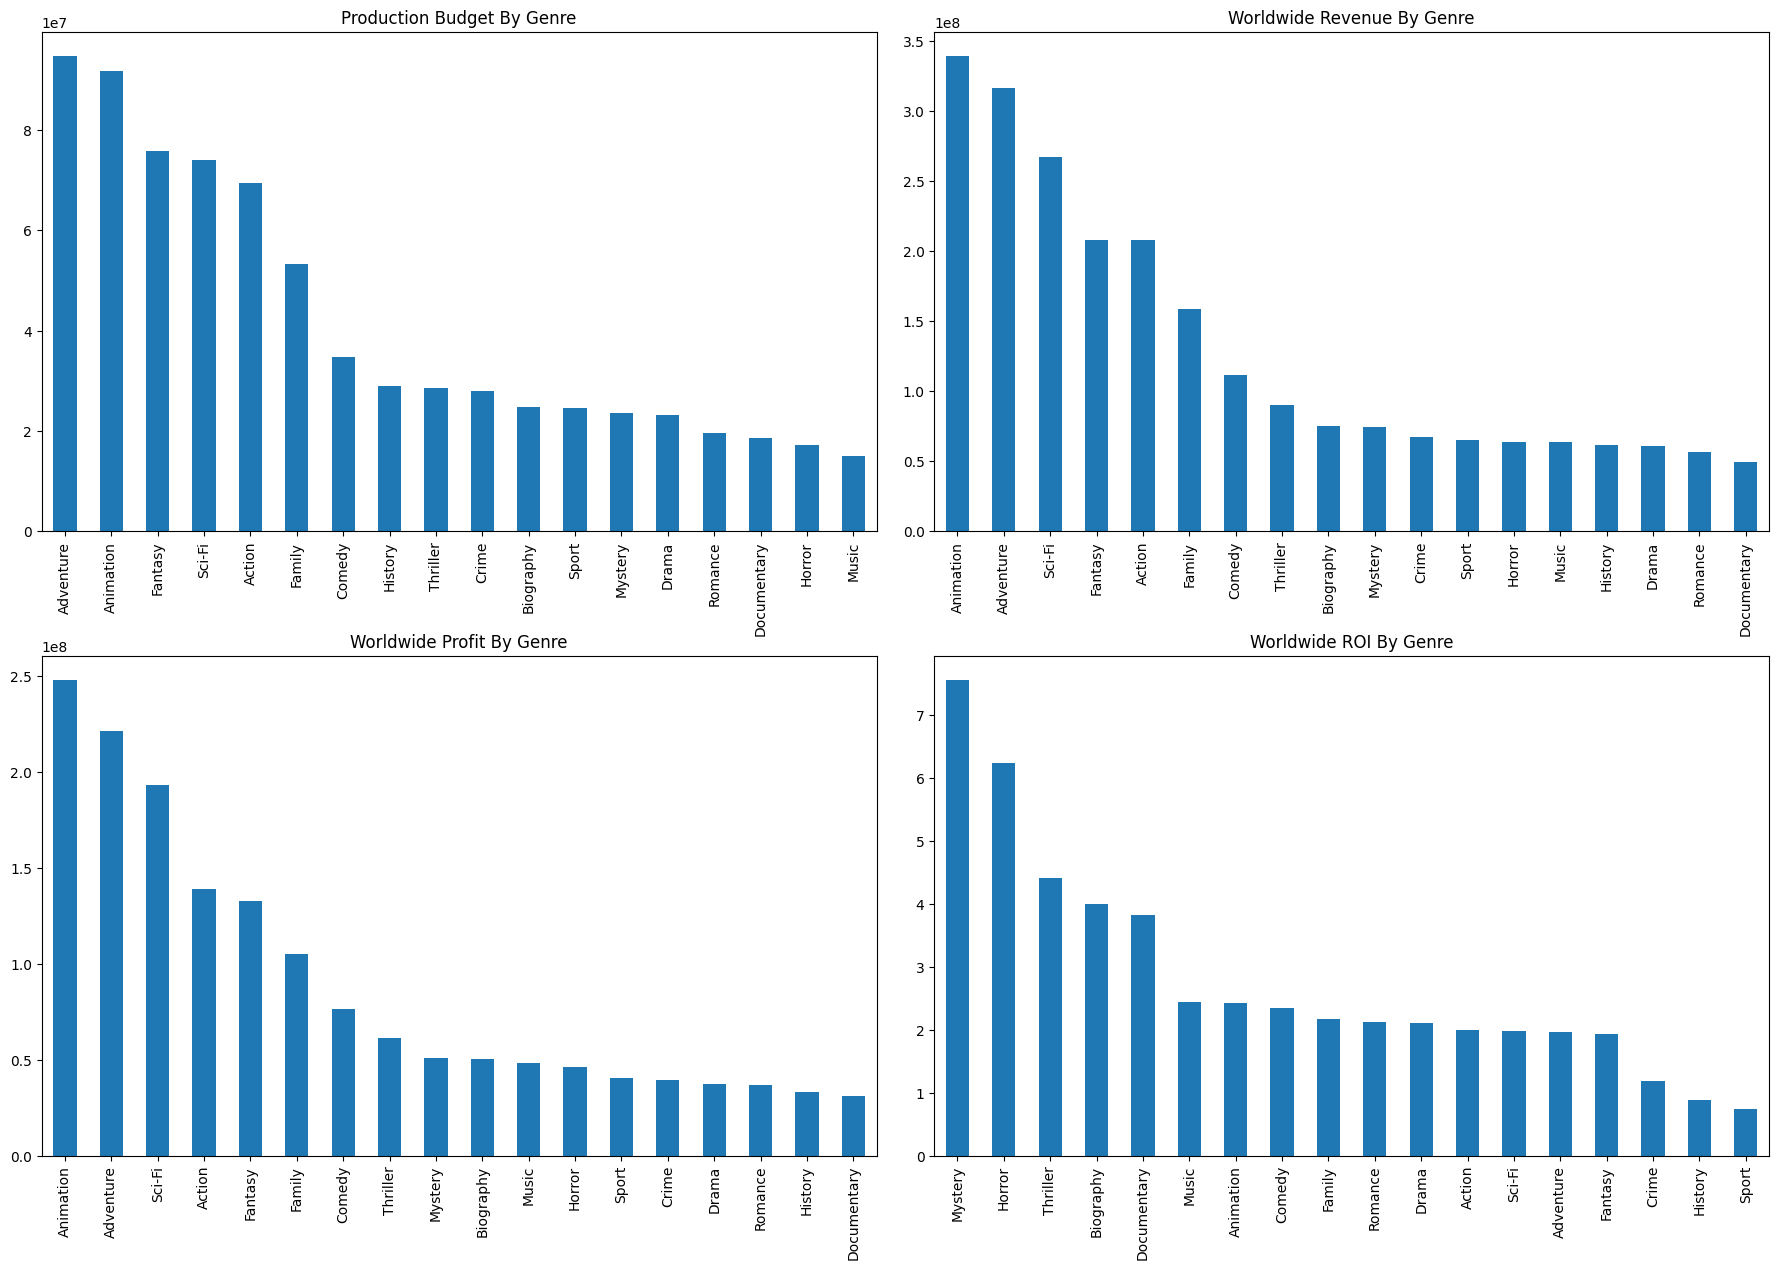

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Get lists of budgets for each genre and plot
genre_vals = get_genre_vals('production_budget', df_merge)
mean_genre_vals = genre_vals.mean().sort_values(ascending=False)
mean_genre_vals.plot.bar(ax=axes[0,0])
axes[0,0].set_title('Production Budget By Genre')
plt.tight_layout()

# Get lists of worldwide gross earnings for each genre and plot
genre_vals = get_genre_vals('worldwide_gross', df_merge)
mean_genre_vals = genre_vals.mean().sort_values(ascending=False)
mean_genre_vals.plot.bar(ax=axes[0,1])
axes[0,1].set_title('Worldwide Revenue By Genre')

# Get lists of worldwide gross profit for each genre and plot
genre_vals = get_genre_vals('worldwide_profit', df_merge)
mean_genre_vals = genre_vals.mean().sort_values(ascending=False)
mean_genre_vals.plot.bar(ax=axes[1,0])
axes[1,0].set_title('Worldwide Profit By Genre')

# Get lists of worldwide gross profit for each genre and plot
genre_vals = get_genre_vals('worldwide_roi', df_merge)
mean_genre_vals = genre_vals.mean().sort_values(ascending=False)
mean_genre_vals.plot.bar(ax=axes[1,1])
axes[1,1].set_title('Worldwide ROI By Genre')

In [17]:
save_figs=1

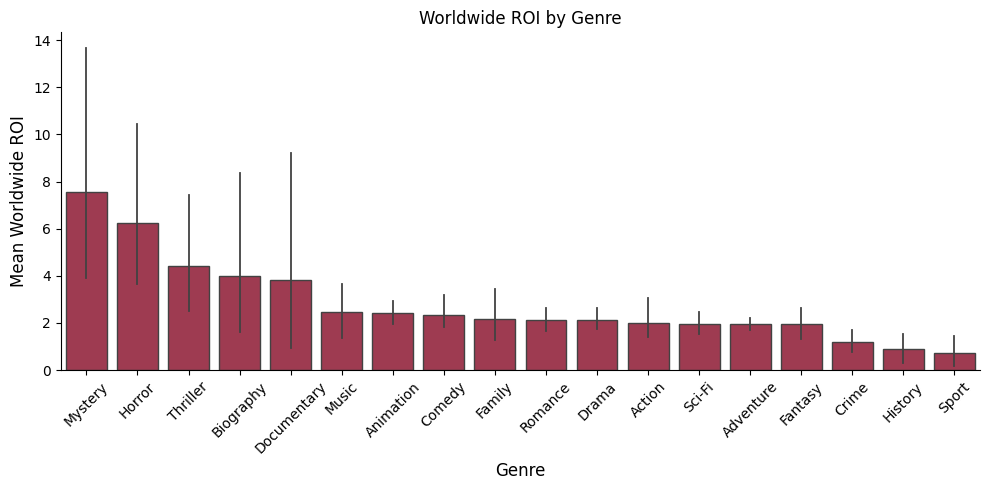

In [18]:
plt.figure(figsize=(10, 5))

# Get lists of worldwide gross profit for each genre and plot
genre_vals = get_genre_vals('worldwide_roi', df_merge)
#mean_genre_vals = genre_vals.mean().sort_values(ascending=False)
#sns.barplot(x=mean_genre_vals.index, y=mean_genre_vals.values)

order = genre_vals.mean().sort_values(ascending=False).index
genre_vals = genre_vals.melt(var_name='genre', value_name='ROI').dropna(subset=['ROI'])
#genre_vals = genre_vals[genre_vals['ROI'] < 200]
sns.barplot(data=genre_vals, x='genre', y='ROI', order = order, color='#Af2a48', edgecolor='0.26', linewidth=1, errwidth=1.3)
    
# Customize the plot (e.g., set labels, rotate x-axis labels)
plt.xticks(rotation=45)
plt.xlabel('Genre', size=12)
plt.ylabel('Mean Worldwide ROI', size=12)
plt.title('Worldwide ROI by Genre')

# Show the plot
plt.tight_layout()
sns.despine()

if save_figs==1:
    plt.savefig('imgs/roi_by_genre.png', dpi=300, bbox_inches='tight')

In [19]:
# Define the genres to check for
genres_to_check = ['Mystery', 'Horror', 'Thriller']

# Create the 'top_3_genres' column
df_merge['top_3_genres'] = df_merge['genres'].apply(lambda x: [1 if (x is not None) and (genre in x) else 0 for genre in genres_to_check])
df_merge['top_3_genres'] = df_merge['top_3_genres'].apply(tuple)
df_merge.groupby('top_3_genres')['worldwide_roi'].mean()

top_3_genres
(0, 0, 0)     2.217004
(0, 0, 1)     1.650083
(0, 1, 0)     2.983424
(0, 1, 1)     2.818667
(1, 0, 0)     1.158473
(1, 0, 1)     2.174798
(1, 1, 0)     3.539217
(1, 1, 1)    29.651936
Name: worldwide_roi, dtype: float64

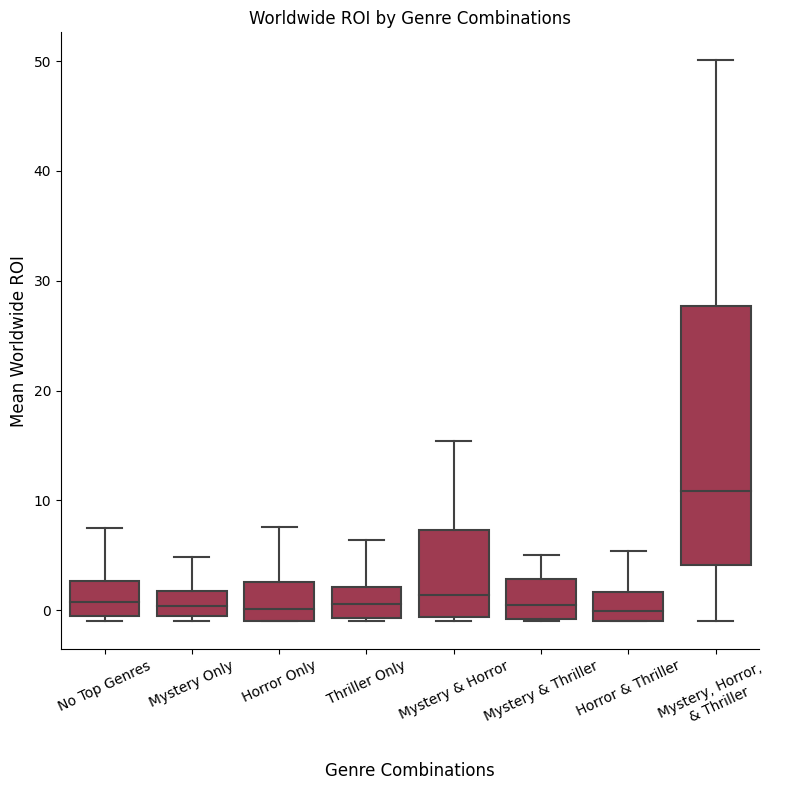

In [20]:
plt.figure(figsize=(8, 8))

['Mystery', 'Horror', 'Thriller']

order = [(0,0,0), (1,0,0), (0,1,0), (0,0,1), (1,1,0), (1,0,1), (0,1,1), (1,1,1)]
labels = ['No Top Genres', 'Mystery Only', 'Horror Only', 'Thriller Only',
          'Mystery & Horror', 'Mystery & Thriller', 'Horror & Thriller', 'Mystery, Horror, \n& Thriller' ]
          
sns.boxplot(data=df_merge, x='top_3_genres', y='worldwide_roi', order = order, showfliers=False, color='#Af2a48')

all_top_med = df_merge[df_merge['top_3_genres'] == (1,1,1)]['worldwide_roi'].median()
#plt.axhline(all_top_med, linestyle = '--', color='r')
plt.xticks(range(len(order)), labels, rotation=25)
plt.xlabel('\nGenre Combinations', size=12)
plt.ylabel('Mean Worldwide ROI', size=12)
plt.title('Worldwide ROI by Genre Combinations')

# Show the plot
plt.tight_layout()
sns.despine()

if save_figs==1:
    plt.savefig('imgs/roi_by_combo_genres.png', dpi=300, bbox_inches='tight')

In [21]:
df_subset = df_merge[df_merge['top_3_genres'] == (1,1,1)].reset_index(drop=True)

## Runtime

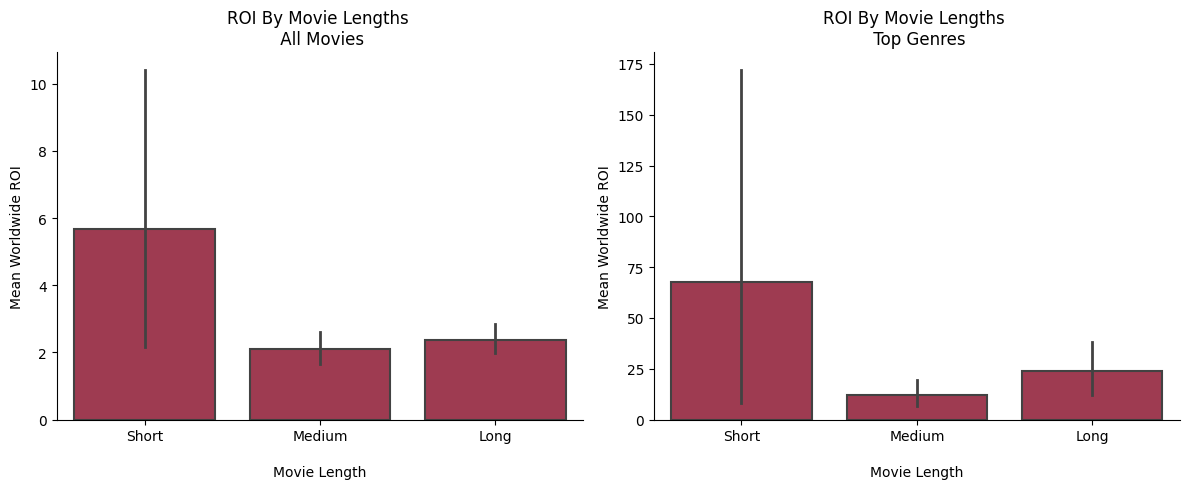

In [22]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.barplot(x='rt_cat', y='worldwide_roi', data=df_merge, order=["Short", "Medium", "Long"], ax=axes[0], 
            color='#Af2a48', edgecolor='0.26', linewidth=1.5, errwidth=2)
axes[0].set_title('ROI By Movie Lengths \n All Movies')
axes[0].set_ylabel('Mean Worldwide ROI')
axes[0].set_xlabel('\nMovie Length')

sns.barplot(x='rt_cat', y='worldwide_roi', data=df_subset, order=["Short", "Medium", "Long"], ax=axes[1], 
            color='#Af2a48', edgecolor='0.26', linewidth=1.5, errwidth=2)
axes[1].set_title('ROI By Movie Lengths \n Top Genres')
axes[1].set_ylabel('Mean Worldwide ROI')
axes[1].set_xlabel('\nMovie Length')

plt.tight_layout()
sns.despine()

if save_figs==1:
    plt.savefig('imgs/roi_by_movie_length.png', dpi=300, bbox_inches='tight')

## Annual Trends

In [23]:
df_merge['release_date'] = pd.to_datetime(df_merge['release_date'])
df_merge['month'] = df_merge['release_date'].dt.month

df_subset['release_date'] = pd.to_datetime(df_subset['release_date'])
df_subset['month'] = df_subset['release_date'].dt.month

In [24]:
# Check if data is present for all months in the full df
months_missing = [month for month in range(1, 13) if month not in df_merge.groupby('month')['worldwide_roi'].mean().index]
print(f"months missing from full df: {months_missing}")

# Check if data is present for all months in the subset df 
months_missing = [month for month in range(1, 13) if month not in df_subset.groupby('month')['worldwide_roi'].mean().index]
print(f"months missing from subset df: {months_missing}")

months missing from full df: []
months missing from subset df: [3, 6]


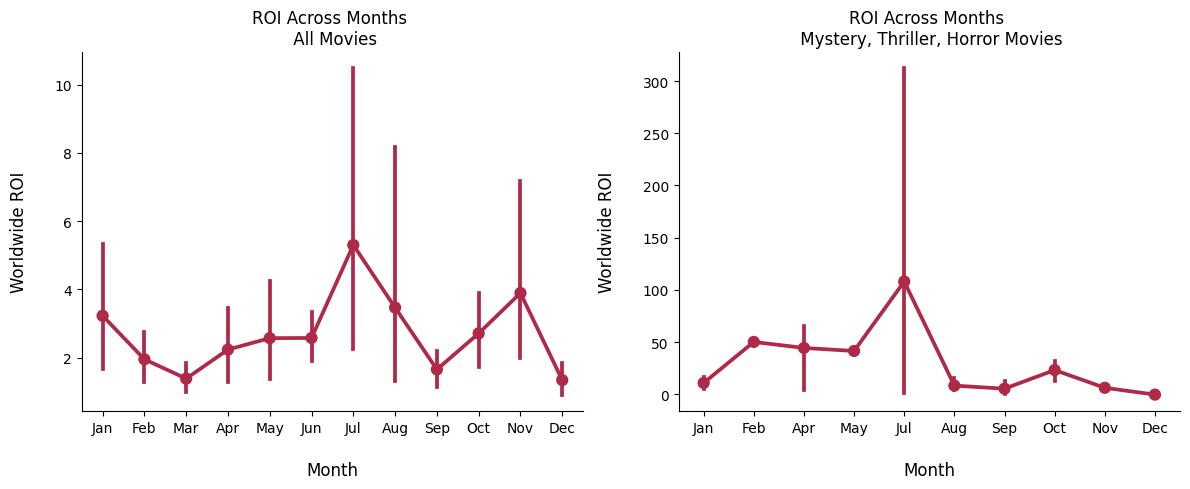

In [25]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.pointplot(data=df_merge, x='month', y='worldwide_roi', color='#Af2a48', ax=axes[0])
axes[0].set_title('ROI Across Months \n All Movies')
axes[0].set_xlabel('\nMonth', size=12)
axes[0].set_ylabel('Worldwide ROI\n', size=12)
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

sns.pointplot(data=df_subset, x='month', y='worldwide_roi', color='#Af2a48', ax=axes[1])
axes[1].set_title('ROI Across Months \n Mystery, Thriller, Horror Movies')
axes[1].set_xlabel('\nMonth', size=12)
axes[1].set_ylabel('Worldwide ROI\n', size=12)
axes[1].set_xticklabels(['Jan', 'Feb', 'Apr', 'May', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
sns.despine()

if save_figs==1:
    plt.savefig('imgs/roi_across_months.png', dpi=300, bbox_inches='tight')

## Writers & Directors

#### Get the directors and writer data

In [26]:
if conn_db == 1: 
    directors = pd.read_sql("""SELECT b.movie_id, b.original_title, p.primary_name AS director
                                FROM movie_basics AS b
                                JOIN directors AS d USING (movie_id)
                                JOIN persons AS p USING (person_id)
                                """, conn)
    directors.drop_duplicates(subset=['movie_id', 'original_title', 'director'], inplace=True)
    writers = pd.read_sql("""SELECT b.movie_id, b.original_title, p.primary_name AS writer
                            FROM movie_basics AS b
                            JOIN writers AS d USING (movie_id)
                            JOIN persons AS p USING (person_id)
                            """, conn)

    writers.drop_duplicates(subset=['movie_id', 'original_title', 'writer'], inplace=True)
    directors.to_csv('data/directors.csv', index=False)
    writers.to_csv('data/writers.csv', index=False)
writers = pd.read_csv('data/writers.csv')
directors = pd.read_csv('data/directors.csv')

#### Make two data frames for Df_merge combined with writers and directors separately

In [27]:
df_merge_writer = df_merge.merge(writers, on='movie_id', how='inner')
df_merge_director = df_merge.merge(directors, on='movie_id', how='inner')

#### Make another data frame that has the count and the average of ROIs for each director
#### Then filter the data to get the Director having a good ROI with more than 4 movies in 

In [28]:
x = df_merge_director.groupby('director')['worldwide_roi'].mean()
y = df_merge_director.groupby('director')['worldwide_roi'].count()
directors_roi_count = pd.concat([x, y], keys=['roi', 'count'], axis=1)
directors_roi_count[(directors_roi_count['roi']>10) & (directors_roi_count['count']>2)]

,roi,count
director,,
Christopher Landon,13.740004,3
Damien Chazelle,10.626585,3
James DeMonaco,17.222144,3
James Wan,23.410492,4
Michael Tiddes,10.231118,3
Pierre Coffin,11.546172,4
Scott Derrickson,11.091304,3


In [29]:
df_merge_director[df_merge_director['director']=='James Wan']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,domestic_roi,worldwide_profit,...,primary_title,runtime_minutes,genres,averagerating,numvotes,rt_cat,top_3_genres,month,original_title,director
54,67,2015-04-03,furious 7,190000000,353007020,1518722794,2015,163007020,0.857932,1328722794,...,furious 7,137.0,"[Action, Crime, Thriller]",7.2,335074,Long,"(0, 0, 1)",4,Furious Seven,James Wan
110,36,2018-12-21,aquaman,160000000,335061807,1146894640,2018,175061807,1.094136,986894640,...,aquaman,143.0,"[Action, Adventure, Fantasy]",7.1,263328,Long,"(0, 0, 0)",12,Aquaman,James Wan
1062,93,2013-07-19,the conjuring,20000000,137400141,318000141,2013,117400141,5.870007,298000141,...,the conjuring,112.0,"[Horror, Mystery, Thriller]",7.5,397233,Long,"(1, 1, 1)",7,The Conjuring,James Wan
2057,63,2011-04-01,insidious,1500000,54009150,99870886,2011,52509150,35.006100,98370886,...,insidious,103.0,"[Horror, Mystery, Thriller]",6.9,254197,Long,"(1, 1, 1)",4,Insidious,James Wan


#### James wan has 4 movies in our dataset, averaging a 23.4 ROI, two of his movies were of the top three genres and they have the highest ROIs amongst his movies

### Repeat the same for the writers

In [30]:
x = df_merge_writer.groupby('writer')['worldwide_roi'].mean()
y = df_merge_writer.groupby('writer')['worldwide_roi'].count()
writers_roi_count = pd.concat([x, y], keys=['roi', 'count'], axis=1)
writers_roi_count[(writers_roi_count['roi']>10) & (directors_roi_count['count']>2)]

,roi,count
writer,,
Christopher Landon,28.672041,5
Damien Chazelle,14.286455,4
James DeMonaco,15.293864,4


In [31]:
df_merge_writer[df_merge_writer['writer']=='Christopher Landon']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,domestic_roi,worldwide_profit,...,primary_title,runtime_minutes,genres,averagerating,numvotes,rt_cat,top_3_genres,month,original_title,writer
3088,25,2015-10-30,scouts guide to the zombie apocalypse,15000000,3703046,15554855,2015,-11296954,-0.753130,554855,...,scouts guide to the zombie apocalypse,93.0,"[Action, Comedy, Horror]",6.3,40479,Medium,"(0, 1, 0)",10,Scouts Guide to the Zombie Apocalypse,Christopher Landon
3839,51,2011-10-21,paranormal activity 3,5000000,104028807,207039844,2011,99028807,19.805761,202039844,...,paranormal activity 3,83.0,"[Horror, Mystery, Thriller]",5.8,85689,Short,"(1, 1, 1)",10,Paranormal Activity 3,Christopher Landon
3847,59,2012-10-19,paranormal activity 4,5000000,53900335,142817992,2012,48900335,9.780067,137817992,...,paranormal activity 4,88.0,"[Horror, Mystery, Thriller]",4.6,58408,Medium,"(1, 1, 1)",10,Paranormal Activity 4,Christopher Landon
3856,70,2014-01-03,paranormal activity: the marked ones,5000000,32462372,90904854,2014,27462372,5.492474,85904854,...,paranormal activity: the marked ones,84.0,"[Horror, Mystery, Thriller]",5.0,37147,Short,"(1, 1, 1)",1,Paranormal Activity: The Marked Ones,Christopher Landon
4110,65,2010-10-20,paranormal activity 2,3000000,84752907,177512032,2010,81752907,27.250969,174512032,...,paranormal activity 2,91.0,[Horror],5.7,93122,Medium,"(0, 1, 0)",10,Paranormal Activity 2,Christopher Landon


#### Christopher Landon has 6 movies in our dataset, averaging a 24.9 ROI, all of his movies have at least one of the top three genres.